In [1]:
import numpy as np
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, Concatenate, Conv2D, Conv1D, Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
import tensorflow.keras.backend as K
# from sklearn.utils import shuffle

In [2]:
df_mineral = pd.read_csv("D:/data/minerals preprocessed data/7.csv")
df_mineral

,pixspec_0,pixspec_1,pixspec_2,pixspec_3,pixspec_4,pixspec_5,pixspec_6,pixspec_7,pixspec_8,pixspec_9,...,pixspec_230,pixspec_231,pixspec_232,pixspec_233,pixspec_234,pixspec_235,pixspec_236,pixspec_237,pixspec_238,pixspec_239
0,-0.761027,-0.741144,-0.736953,-0.748453,-0.775643,-0.818525,-0.930236,-1.002305,-1.135988,-1.135991,...,-0.189501,-0.232913,-0.287395,-0.339940,-0.414572,-0.435938,-0.438705,-0.422876,-0.388448,-0.335423
1,-1.159768,-0.992435,-0.855978,-0.750396,-0.675690,-0.631860,-0.668273,-0.750864,-0.833403,-0.766321,...,-1.299305,-1.321850,-1.345657,-1.409046,-1.448835,-1.485602,-1.519644,-1.550959,-1.579549,-1.605412
2,-0.147280,-0.113576,-0.082923,-0.055323,-0.030773,-0.009276,-0.028390,0.018269,0.022361,0.040399,...,-2.084954,-2.137409,-2.124460,-2.167637,-2.170784,-2.197371,-2.227048,-2.259816,-2.295673,-2.334621
3,-1.872361,-1.751394,-1.642471,-1.545593,-1.460758,-1.387968,-1.383438,-1.239705,-1.246754,-1.237428,...,-1.780612,-1.802767,-1.755806,-1.805099,-1.823955,-1.890302,-1.978168,-2.087551,-2.218453,-2.370872
4,0.970451,0.586126,0.478399,0.262945,0.073605,-0.106819,-0.252848,-0.341721,-0.387035,-0.419459,...,-1.022179,-0.996924,-0.990705,-1.000812,-1.026314,-1.026135,-1.023343,-1.017938,-1.009920,-0.999289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110930,-0.061313,0.041711,0.134566,0.217252,0.289768,0.352115,0.372237,0.423069,0.439277,0.537058,...,-1.406369,-1.473999,-1.568291,-1.691270,-1.710499,-1.750866,-1.783251,-1.807654,-1.824075,-1.832513
110931,0.248035,0.244857,0.244409,0.246691,0.251704,0.259448,0.288154,0.299918,0.302538,0.307425,...,-2.015873,-1.977967,-2.010013,-2.111714,-2.177325,-2.212556,-2.249175,-2.287181,-2.326576,-2.367357
110932,0.689387,0.745079,0.794364,0.837243,0.873715,0.903781,0.944636,0.921587,0.962435,0.963500,...,-1.793135,-1.763144,-1.733103,-1.775945,-1.808932,-1.871211,-1.952326,-2.052277,-2.171062,-2.308683
110933,0.550203,0.594220,0.629748,0.656786,0.675335,0.685394,0.665314,0.574144,0.630405,0.671850,...,-1.742390,-1.484780,-1.272822,-1.159626,-1.115382,-1.139220,-1.223179,-1.367259,-1.571461,-1.835784


In [3]:
#importing Wavelength as df
df_W = pd.read_csv("D:/data/Wavelength.csv")
df_W

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,1.0471,1.0537,1.0603,1.0668,1.0734,1.0799,1.0865,1.093,1.0996,1.1061,...,2.5823,2.5889,2.5955,2.6021,2.6087,2.6153,2.6219,2.6285,2.6351,2.6417


In [4]:
# load fashion mnist images
def load_real_samples():
    
    # load dataset
    (trainX, _), (_, _) = load_data()
    
    # expand to 3d, e.g. add channels
    X = expand_dims(trainX, axis=-1)
    
    # convert from ints to floats
    X = X.astype('float32')
    
    # scale from [0,255] to [-1,1]
    X = (X - 127.5) / 127.5
    return X

# select real samples
def generate_real_samples(dataset, n_samples):
    
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    
    # select images
    X = dataset[ix]
    X=X.reshape(X.shape[0],1,X.shape[1],1)
    print(X.shape)
    
    # generate class labels
    y = ones((n_samples, 1))
    
    return X, y

In [5]:
# define the standalone discriminator model
def define_discriminator(in_shape=(1,240,1)):
    model = Sequential()
    
    # downsample
    model.add(Conv2D(50, (1,3), strides=(1,2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    
    # downsample
    model.add(Conv2D(128, (1,3), strides=(1,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    opt = Adam(learning_rate = 0.0002, beta_1 = 0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [6]:
# define the standalone generator model
def define_generator(latent_dim):
    model = Sequential()
    # foundation for 7x7 image
    n_nodes = 240*128
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((1,240,128)))

# #     # upsample to 14x14
#     model.add(Conv2DTranspose(128, (1,4), strides=(1,2), padding='same'))
#     model.add(LeakyReLU(alpha=0.2))
# #     # upsample to 28x28
#     model.add(Conv2D(128, (1,4), strides=(1,2), padding='same'))
#     model.add(LeakyReLU(alpha=0.2))
# #     # generate
    model.add(Conv2D(128, (1,240), activation='tanh', padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(.6))
    
    model.add(Conv2D(64, (1,240), activation='tanh', padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(.5))
    
    model.add(Conv2D(32, (1,128), activation='tanh', padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(.4))
    
    model.add(Conv2D(1, (1,240), activation='tanh', padding='same'))
    return model

In [7]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    
    # connect them
    model = Sequential()
    
    # add generator
    model.add(generator)
    
    # add the discriminator
    model.add(discriminator)
    
    # compile model
    opt = Adam(learning_rate = 0.00002, beta_1 = 0.00005)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [8]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
   
    # predict outputs
    X = generator.predict(x_input)
    
    # create class labels
    y = zeros((n_samples, 1))
    return X, y

In [9]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs, loss_values, n_batch=150,):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)

    # manually enumerate epochs
    for i in range(n_epochs):
        temp_loss = np.zeros((2, 3))
        
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            temp_loss[j][0] = d_loss1
            
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            
            # update discriminator model weights
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            temp_loss[j][1] = d_loss2
            
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            temp_loss[j][2] = g_loss
            
            # summarize loss on this batch
            print('epoch->%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
                (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
        
        loss_values[i][:] = temp_loss.mean(axis = 0)
    
    # save the generator model
    g_model.save(f'generator_{n_epochs}.h5')
    return loss_values

GAN model changed batch to 150 and samples to 300

In [10]:
dataset = np.array(df_mineral.sample(n = 300))
dataset.shape

(300, 240)

In [11]:
# temp_loss = np.zeros((2, 3))
# tmp_loss = np.zeros((5, 3))
# temp_loss[0][1] = 2
# temp_loss[1][1] = 44
# temp_loss[0][2] = 5
# # temp_loss.mean(axis = 0)
# temp_loss

In [12]:
# tmp_loss[2][:] = temp_loss.mean(axis = 0)
# tmp_loss

In [13]:
# size of the latent space
latent_dim = 10

# create the discriminator
discriminator = define_discriminator()

# create the generator
generator = define_generator(latent_dim)

# create the gan
gan_model = define_gan(generator, discriminator)

Epochs = 100

In [14]:
# Number of epochs
epochs = 100

# Loss value initiation
loss_val = np.zeros((epochs, 3))

In [15]:
# train model
loss_list = train(generator, discriminator, gan_model, dataset, latent_dim, epochs, loss_val)

(75, 1, 240, 1)
3/3 [==============================] - 3s 840ms/step
epoch->1, 1/2, d1=0.744, d2=0.695 g=0.692
(75, 1, 240, 1)
3/3 [==============================] - 5s 1s/step
epoch->1, 2/2, d1=0.673, d2=0.695 g=0.691
(75, 1, 240, 1)
3/3 [==============================] - 3s 987ms/step
epoch->2, 1/2, d1=0.622, d2=0.696 g=0.690
(75, 1, 240, 1)
3/3 [==============================] - 3s 931ms/step
epoch->2, 2/2, d1=0.577, d2=0.698 g=0.688
(75, 1, 240, 1)
3/3 [==============================] - 4s 1s/step
epoch->3, 1/2, d1=0.521, d2=0.703 g=0.686
(75, 1, 240, 1)
3/3 [==============================] - 3s 985ms/step
epoch->3, 2/2, d1=0.477, d2=0.708 g=0.682
(75, 1, 240, 1)
3/3 [==============================] - 3s 949ms/step
epoch->4, 1/2, d1=0.440, d2=0.713 g=0.675
(75, 1, 240, 1)
3/3 [==============================] - 3s 957ms/step
epoch->4, 2/2, d1=0.398, d2=0.735 g=0.657
(75, 1, 240, 1)
3/3 [==============================] - 3s 897ms/step
epoch->5, 1/2, d1=0.368, d2=0.809 g=0.601
(75, 1,

1/1 [==============================] - 0s 175ms/step


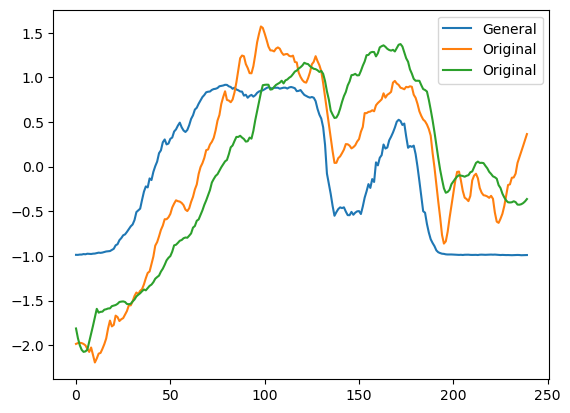

In [16]:
# example of loading the generator model and generating images
from tensorflow.keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):

    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input
 
# create and save a plot of generated images (reversed grayscale)
# def show_plot(examples, n):
#     # plot images
#     for i in range(n * n):
#         # define subplot
#         pyplot.subplot(n, n, 1 + i)
#         # turn off axis
#         pyplot.axis('off')
#         # plot raw pixel data
#         pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
#     pyplot.show()

# load model
model = load_model(f'generator_{epochs}.h5', compile=False)

# generate images
latent_points = generate_latent_points(latent_dim, 1)

# generate images
X = model.predict(latent_points)

# plot the result
# show_plot(X, 10)
plt.plot(np.arange(240), X[0][0], label='General')
plt.plot(np.arange(240), dataset[0], label='Original')
plt.plot(np.arange(240), dataset[1], label='Original')
plt.legend()
plt.show()

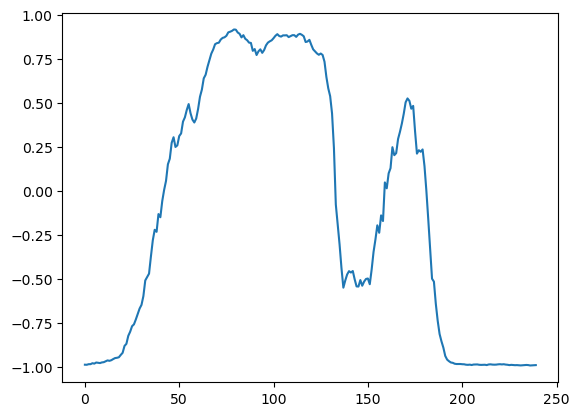

In [17]:
pyplot.plot(np.arange(240), X[0][0], label='General')

In [18]:
loss = pd.DataFrame(loss_list)

In [19]:
loss

,0,1,2
0,0.708551,0.694760,0.691094
1,0.599881,0.697099,0.688754
2,0.498970,0.705198,0.683923
3,0.419041,0.723980,0.666200
4,0.362812,0.866570,0.567525
5,0.342314,1.025846,0.482088
6,0.348953,1.000005,0.508214
7,0.376809,0.914640,0.553310
8,0.385701,0.934742,0.536652
9,0.406696,0.952627,0.526564


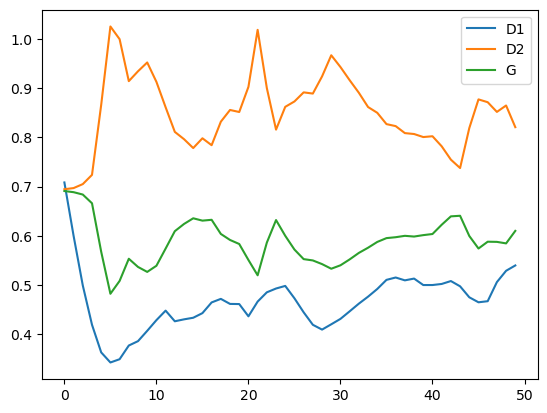

In [20]:
plt.plot(np.arange(epochs), loss[:][0], label='D1')
plt.plot(np.arange(epochs), loss[:][1], label='D2')
plt.plot(np.arange(epochs), loss[:][2], label='G')
plt.legend()
plt.show()